#Task-03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Sample Dateset :- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_text

In [105]:
data = pd.read_csv('bank.csv')

## Reading and analysis of data

In [106]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [107]:
data.shape

(11162, 17)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [109]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [110]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


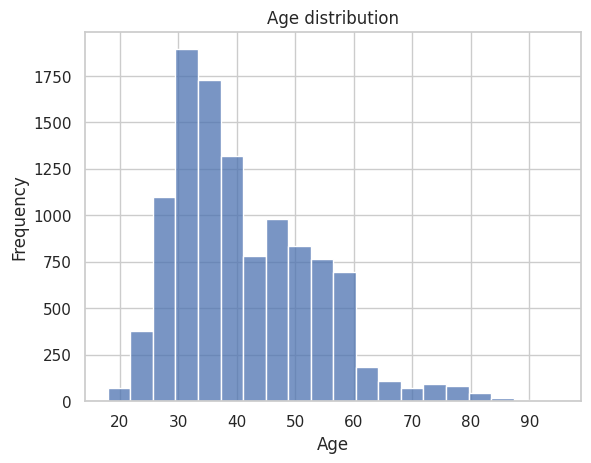

In [111]:
sns.set(style="whitegrid")
sns.histplot(data.age, bins=20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency');

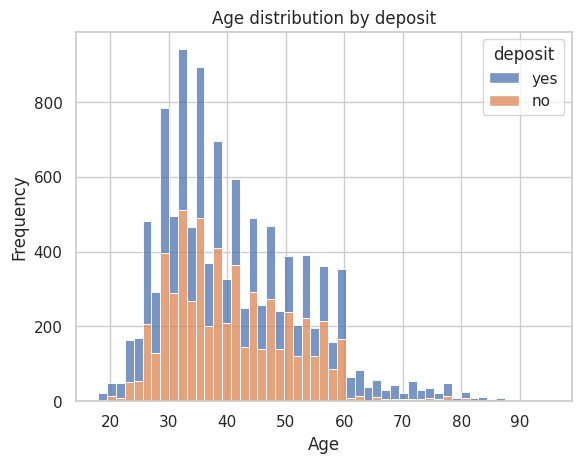

In [112]:
sns.histplot(data=data, x="age", hue="deposit", multiple="stack")
plt.title('Age distribution by deposit')
plt.xlabel('Age')
plt.ylabel('Frequency');

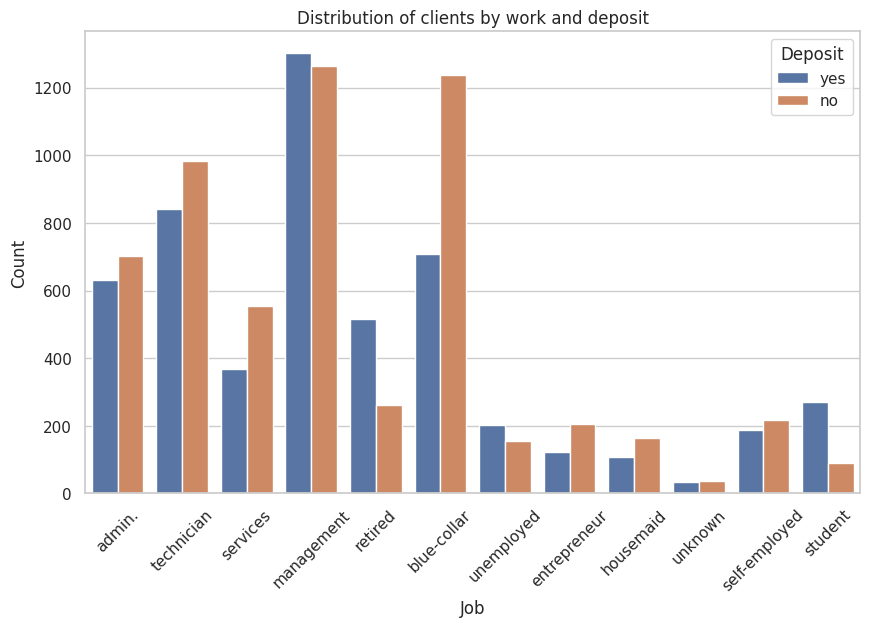

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='deposit', data=data)
plt.title('Distribution of clients by work and deposit')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit')

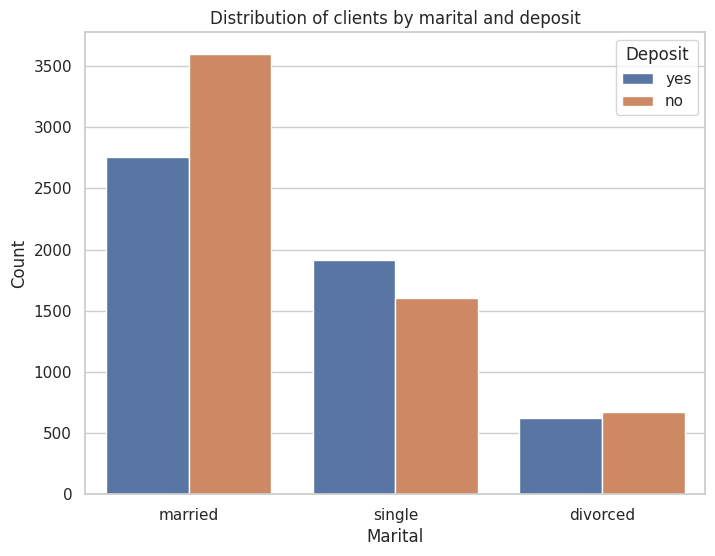

In [114]:
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='deposit', data=data)
plt.title('Distribution of clients by marital and deposit')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.legend(title='Deposit')
plt.show()

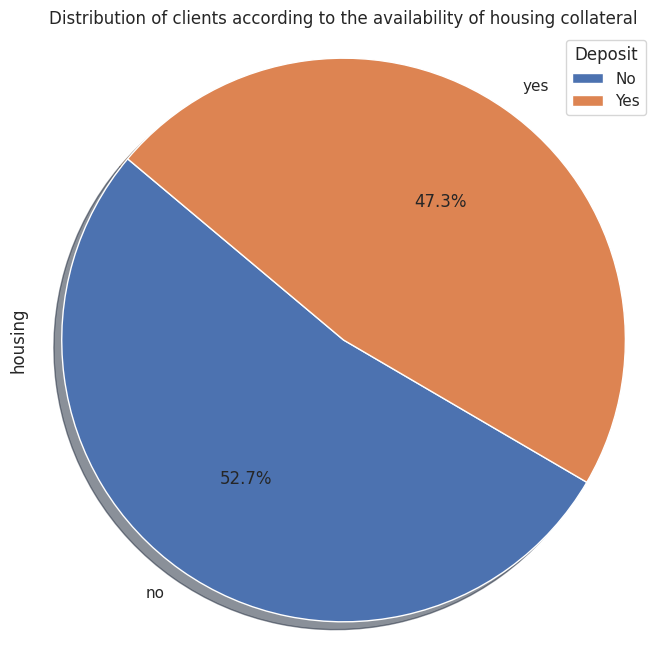

In [115]:
plt.figure(figsize=(8, 8))
data['housing'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of clients according to the availability of housing collateral')
plt.axis('equal')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.show()

<ipython-input-116-2b87c0b0e803>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


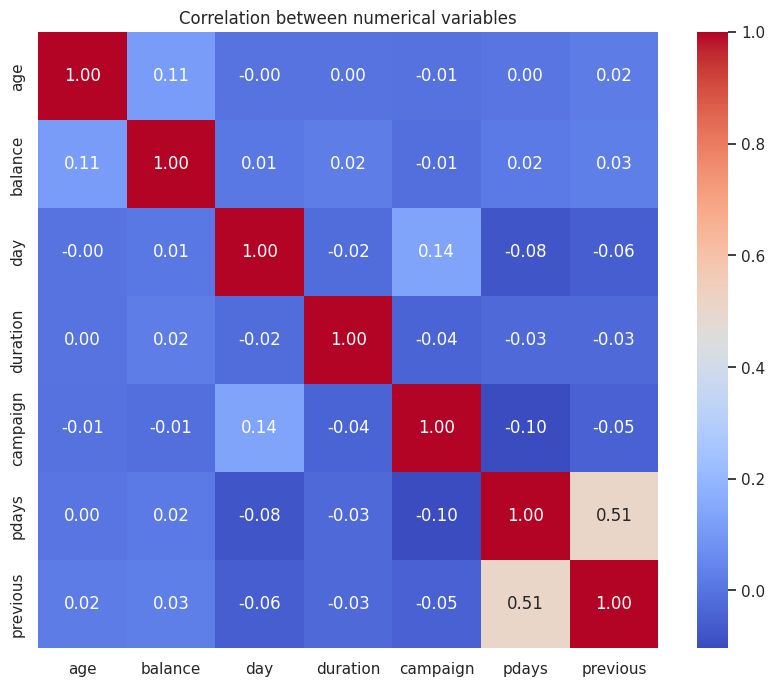

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between numerical variables')
plt.show()

##Preparation of data and creation of a decision tree

In [117]:
X = data.drop(columns=['deposit'])
y = data.deposit

In [118]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [119]:
categorical_columns = [column for column in X.columns if X[column].dtype != np.int64]

In [120]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
  X[column] = label_encoder.fit_transform(X[column])

X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [124]:
y_pred

array(['no', 'yes', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [125]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7841146610928635


In [126]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1386  356]
 [ 367 1240]]


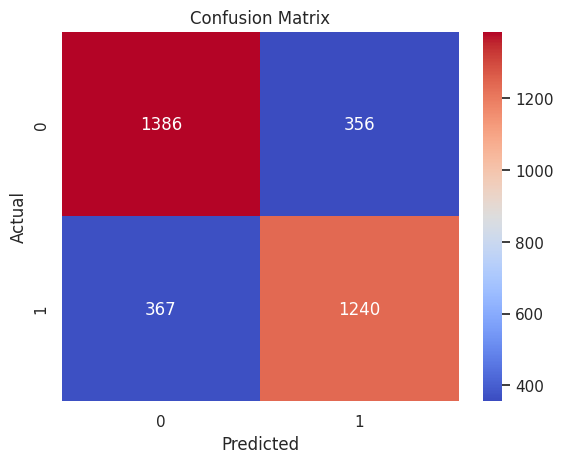

In [127]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [128]:
tree_structure = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_structure)

Decision Tree Structure:
|--- duration <= 251.50
|   |--- pdays <= 17.50
|   |   |--- month <= 9.50
|   |   |   |--- month <= 0.50
|   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |--- duration <= 95.00
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- duration >  95.00
|   |   |   |   |   |   |--- day <= 29.50
|   |   |   |   |   |   |   |--- age <= 72.50
|   |   |   |   |   |   |   |   |--- balance <= 16137.50
|   |   |   |   |   |   |   |   |   |--- day <= 18.00
|   |   |   |   |   |   |   |   |   |   |--- age <= 44.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- age >  44.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- day >  18.00
|   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |--- balance >  16137.50
|   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   

##Improvement of the decision tree

In [129]:
from sklearn.model_selection import GridSearchCV

clf2 = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [130]:
best_estimator = grid_search.best_estimator_
best_parameters = grid_search.best_params_

In [131]:
best_parameters

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [132]:
y_pred = best_estimator.predict(X_test)

In [133]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8145715138847417


In [134]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1427  315]
 [ 306 1301]]


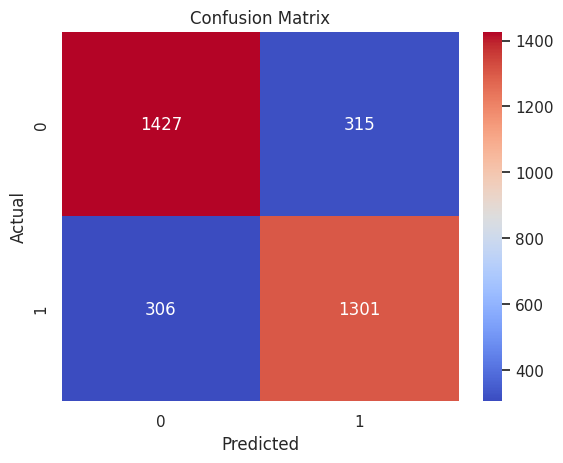

In [135]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [136]:
tree_structure = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_structure)

Decision Tree Structure:
|--- duration <= 251.50
|   |--- pdays <= 17.50
|   |   |--- month <= 9.50
|   |   |   |--- month <= 0.50
|   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |--- duration <= 95.00
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- duration >  95.00
|   |   |   |   |   |   |--- day <= 29.50
|   |   |   |   |   |   |   |--- age <= 72.50
|   |   |   |   |   |   |   |   |--- balance <= 16137.50
|   |   |   |   |   |   |   |   |   |--- day <= 18.00
|   |   |   |   |   |   |   |   |   |   |--- age <= 44.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- age >  44.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- day >  18.00
|   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |--- balance >  16137.50
|   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   